In [1]:
import pandas as pd
import numpy as np
#import psycopg2

In [2]:
#Get the data which was exported from Dbeaver. It should have 21597 rows.
df=pd.read_csv('data/king_county_house_details.csv', parse_dates=['date'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   bedrooms       21597 non-null  float64       
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  float64       
 4   sqft_lot       21597 non-null  float64       
 5   floors         21597 non-null  float64       
 6   waterfront     19206 non-null  float64       
 7   view           21534 non-null  float64       
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  float64       
 11  sqft_basement  21145 non-null  float64       
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   17749 non-null  float64       
 14  zipcode        21597 non-null  int64         
 15  lat            2159

In [4]:
#Thomas Hansen: 5 kids, no money, wants nice (social) neighborhood, Timing?, Location?
# 1. optimisation problem with the constrains on kids, budget and neighboorhood 
# 2. big house at least 3 bedrooms (2 for kids one for parents) in a social neighboorhood
# 3. to make it affordable we can look for old houses without renovation


In [5]:
df.head(10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0
5,7237550310,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3,11,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760.0,101930.0,2014-05-12,1230000.0
6,1321400060,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3,7,...,NaN,1995,0.0,98003,47.3097,-122.327,2238.0,6819.0,2014-06-27,257500.0
7,2008000270,3.0,1.50,1060.0,9711.0,1.0,0.0,NaN,3,7,...,0.0,1963,0.0,98198,47.4095,-122.315,1650.0,9711.0,2015-01-15,291850.0
8,2414600126,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,3,7,...,730.0,1960,0.0,98146,47.5123,-122.337,1780.0,8113.0,2015-04-15,229500.0
9,3793500160,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3,7,...,0.0,2003,0.0,98038,47.3684,-122.031,2390.0,7570.0,2015-03-12,323000.0


In [6]:
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [7]:
df[['yr_built', 'yr_renovated']] #year_renovated should be converted int

,yr_built,yr_renovated
0,1955,0.0
1,1951,19910.0
2,1933,NaN
3,1965,0.0
4,1987,0.0
...,...,...
21592,2009,0.0
21593,2014,0.0
21594,2009,0.0
21595,2004,0.0


In [8]:
df['yr_renovated1'] = (
    df['yr_renovated']
    .astype(str)          # convert to string
    .str.extract(r'(\d{4})')  # take first 4 digits
    .astype('float').astype('Int64')  # convert back to integer
)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   bedrooms       21597 non-null  float64       
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  float64       
 4   sqft_lot       21597 non-null  float64       
 5   floors         21597 non-null  float64       
 6   waterfront     19206 non-null  float64       
 7   view           21534 non-null  float64       
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  float64       
 11  sqft_basement  21145 non-null  float64       
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   17749 non-null  float64       
 14  zipcode        21597 non-null  int64         
 15  lat            2159

In [31]:
df[['yr_renovated', 'yr_renovated1']].head()

,yr_renovated,yr_renovated1
0,0.0,0
1,19910.0,1991
2,NaN,0
3,0.0,0
4,0.0,0


In [15]:
df['yr_renovated1'] = df['yr_renovated1'].fillna(0)

In [32]:
df[['yr_renovated', 'yr_renovated1']].head()

,yr_renovated,yr_renovated1
0,0.0,0
1,19910.0,1991
2,NaN,0
3,0.0,0
4,0.0,0


In [18]:
df.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
yr_renovated1       0
dtype: int64

already filled nulls in yr_renovated. Now lets fill nulls in other columns: waterfront, sqft_basement, view.

In [25]:
def get_mean_median_mode(df, columns):
    stats = {
        'median': df[columns].median().round(2),
        'mean': df[columns].mean().round(2),
        'mode': df[columns].mode().iloc[0].round(2)
    }
    return pd.DataFrame(stats)



In [26]:
cols = ['waterfront', 'sqft_basement', 'view']
result = get_mean_median_mode(df, cols)
print(result)

               median    mean  mode
waterfront        0.0    0.01   0.0
sqft_basement     0.0  291.86   0.0
view              0.0    0.23   0.0


In [30]:
df.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
yr_renovated1       0
dtype: int64

In [54]:
df.view.unique() #how mane time has the house been viewed?

array([ 0., nan,  3.,  4.,  2.,  1.])

In [19]:
df.grade.unique() #This is an overall rating (from 1 to 13) of the housing unit based on 
#the King County grading system. This is a measure of the construction quality and design.
# 1-3: Falls short of minimum building standards or is an inferior structure.
#  7: Represents an average level of construction and design.
#   11-13: Indicates a high or superior quality level of construction and design 
#(e.g., luxury or mansion quality)

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [20]:
df.condition.unique() 
#This column represents the overall condition of the house on a scale of 1 to 5. 
# 1 signifies a poor condition, and 5:very good or superb condition. 
#Most houses in the dataset fall into the average condition rating of 3.

array([3, 5, 4, 1, 2])

In [21]:
df.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

In [63]:
df.waterfront.isna().sum()

np.int64(2391)

In [26]:
df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [33]:
df.info() #bedrooms, floors, bathrooms should be int 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   bedrooms       21597 non-null  float64       
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  float64       
 4   sqft_lot       21597 non-null  float64       
 5   floors         21597 non-null  float64       
 6   waterfront     19206 non-null  float64       
 7   view           21534 non-null  float64       
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  float64       
 11  sqft_basement  21145 non-null  float64       
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   17749 non-null  float64       
 14  zipcode        21597 non-null  int64         
 15  lat            2159

In [34]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,yr_renovated1
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,1991
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,0


In [35]:
df.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [ ]:
city center postcode: 98101, 98104,98121

In [45]:
#the latest built year is 2015. old is defined 20 years and older, so it is before 1995.
df['old'] = df['yr_built'].apply(lambda x: 'old' if x < 1995 else 'new')
df['old']

0        old
1        old
2        old
3        old
4        old
        ... 
21592    new
21593    new
21594    new
21595    new
21596    new
Name: old, Length: 21597, dtype: object

In [49]:
#renovated
df['renovated'] = df['yr_renovated1'].apply(lambda x: 'renovated' if x !=0 else 'not renovated')
df[['yr_renovated1', 'renovated']]

,yr_renovated1,renovated
0,0,not renovated
1,1991,renovated
2,0,not renovated
3,0,not renovated
4,0,not renovated
...,...,...
21592,0,not renovated
21593,0,not renovated
21594,0,not renovated
21595,0,not renovated


In [ ]:
df['price_sq']=df['price']/df['

In [62]:
df.groupby('renovated')['price'].mean()

renovated
not renovated    532140.319858
renovated        768901.892473
Name: price, dtype: float64

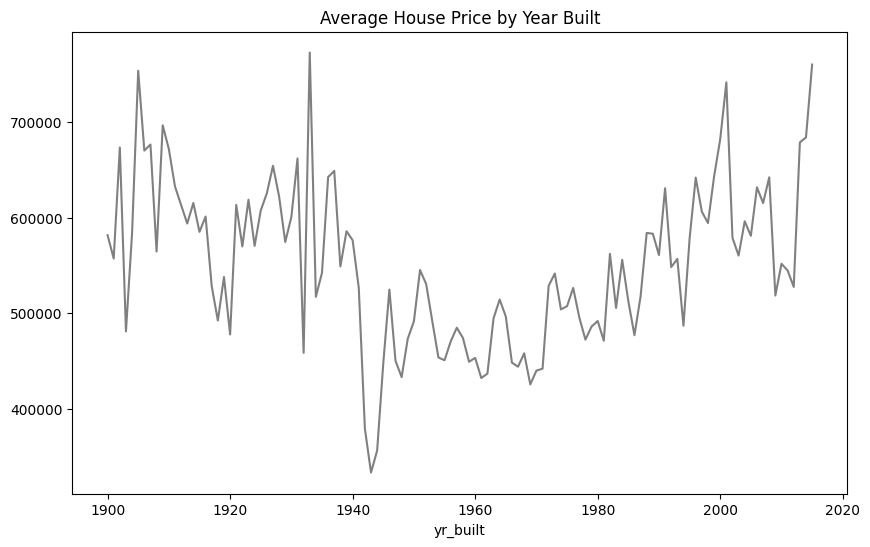

In [60]:
import matplotlib.pyplot as plt

df.groupby('yr_built')['price'].mean().plot(figsize=(10,6), color='gray')
#plt.ylabel("Average Price")
plt.title("Average House Price by Year Built")
plt.show()


In [39]:
df['yr_built'].max()

np.int64(2015)

In [29]:
#!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point

In [31]:
df['geometry'] = df.apply(lambda row: Point(row['long'], row['lat']), axis=1)

gdf = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')


In [33]:
gdf

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,geometry
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,POINT (-122.257 47.5112)
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,POINT (-122.319 47.721)
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,POINT (-122.233 47.7379)
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,POINT (-122.393 47.5208)
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,POINT (-122.045 47.6168)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,...,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0,POINT (-122.346 47.6993)
21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,...,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0,POINT (-122.362 47.5107)
21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,...,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0,POINT (-122.299 47.5944)
21595,291310100,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,...,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0,POINT (-122.069 47.5345)


<Axes: >

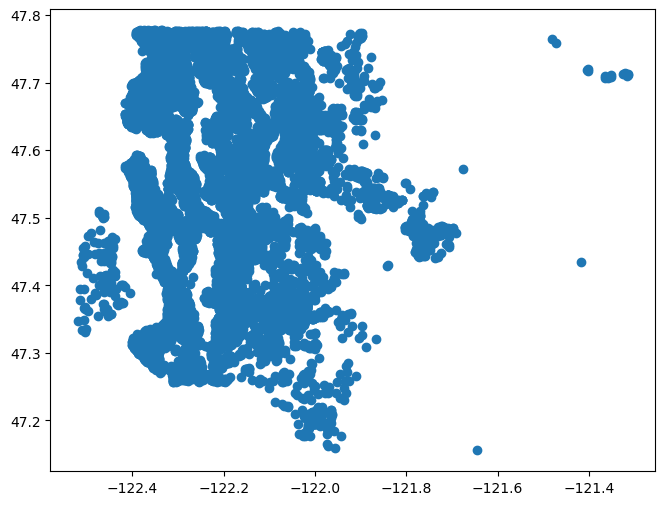

In [32]:
gdf.plot(figsize=(8,6))

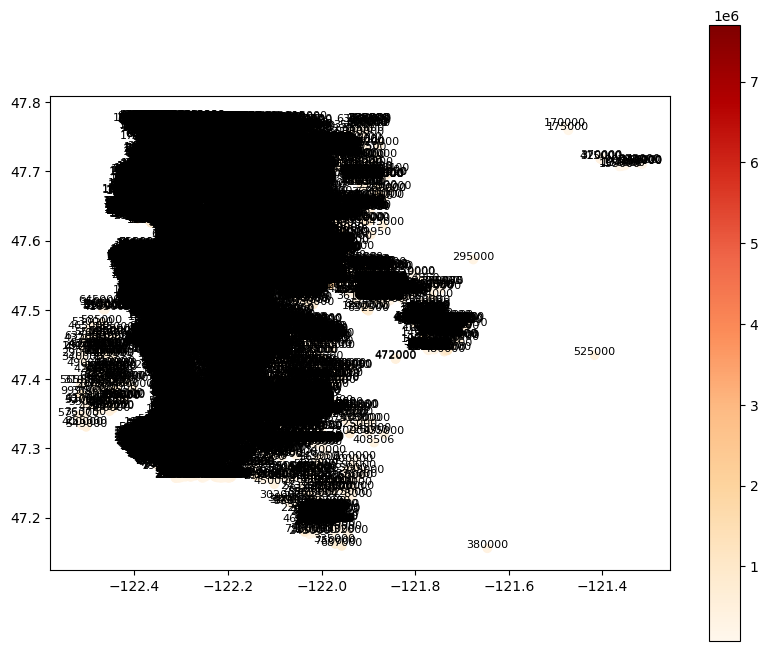

In [34]:
ax = gdf.plot(column='price', cmap='OrRd', figsize=(10,8), legend=True)

for idx, row in gdf.iterrows():
    ax.text(row.geometry.centroid.x,
            row.geometry.centroid.y,
            f"{row['price']:.0f}",
            fontsize=8, ha='center')


<Axes: >

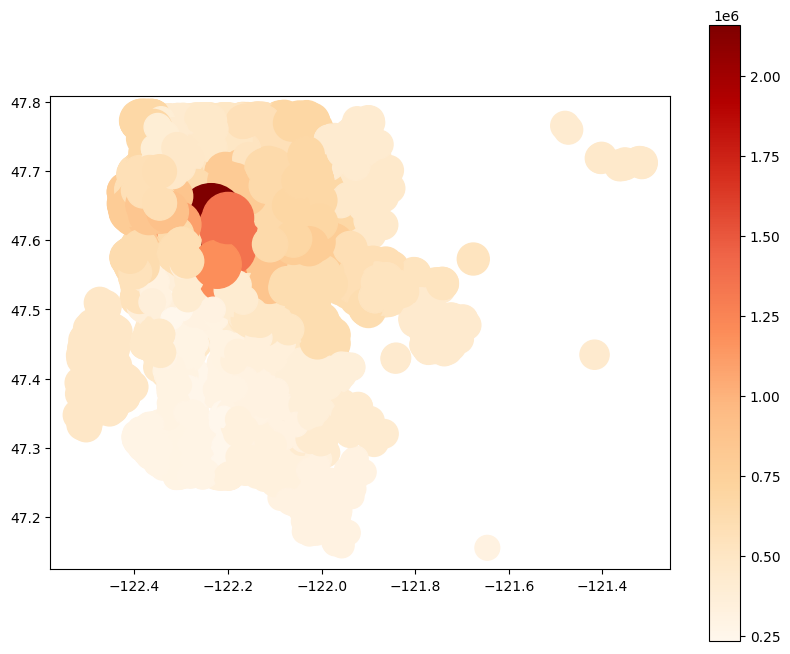

In [38]:
gdf['avg_price'] = gdf.groupby('zipcode')['price'].transform('mean')

gdf.plot(
    figsize=(10,8),
    column='avg_price',
    cmap='OrRd',
    markersize=gdf['avg_price'] / 1000,  # scale marker size
    legend=True
)


In [42]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64